# Texas Derby, Austin, Dallas or Houston?

## Introduction / Scope

**Austin, Dallas, and Houston** are the three major cities in the great state of Texas. In the past decades, these three cities have experienced rapid population growth amid Texas’s progressing economy. **Austin**, being the capital of the Lonestar State with an eclectic mix of history, culture, and gorgeous sights, has also emerged as a technology hub. Austin’s Silicone Hill is considered a substitute for the Bay Area’s Silicon Valley. **Dallas**, together with its rapidly growing twin city of Fort Worth and other satellite cities in the vicinity, stands as a multi-versed financial and technology center at the Southwest. **Houston** has always been the energy center in America. It’s energy, engineering, petrochemical, and other industries have empowered this city with a robust lifestyle.

**Texas** has been consistently ranked number one for the inflow of migrants from other states across America due to employment opportunities and relatively low living cost. While most of the people inflow will settle down in one of the three cities abovementioned, the cities themselves have a lot of things to offer and explore. **This analysis intends to show which areas (by Zip Code) of a town resemble those of the others.(Austin, Dallas, Houston).** 


### This report could be helpful for different use cases:



•	**People moving from one city to the other** often would like to live in a particular type of neighborhood. This comparison can help those to filter for areas similar (or even different, if you are up for something new) to what you are used to.

•	**People moving from other states to Texas** often wonder where to settle down. This comparison can help those to filter for neighborhoods similar or different from their original came from, and introduce them into local fun and popular places.

•	**Companies expanding within one of the cities** might want to look for a similar type of neighborhoods, as they are targeting a specific user group. The comparison can offer the first indication.

•	**Companies expanding from one city to the other** might also try to find a neighborhood to settle in first. They can use their experience from the original city and look for a fitting (e.g., similar) neighborhood in the second one.

**Austin, Texas** [image source](https://cdn1.austinchamber.com/marketing/large-promos/xLargePromo_Overview_AustinSkylineMorning_1600x900.jpg?mtime=20190610134459)
<img src="Austin.jpg">

**Dallas, Texas** [Image Source]( https://www.edgenegotiation.com/wp-content/uploads/2018/04/Dallas.jpg)
<img src="Dallas.jpg">

**Houston, Texas** [Image Source]( https://media.radissonhotels.net/image/Destination-Pages/Localattraction/16256-118729-f63246008_3XL.jpg?impolicy=HomeHero)
<img src="Houston.png">

## Data Collection

#### Two different kinds of data are used for this comparison.

**1. City zipcode area and corresponding geographical data**:  to analyze the cities on a meaningful level, they need to be divided into different areas, e.g., neighborhoods, boroughs, or simply by **zip codes**. Luckily the zipcode data is readily available on the internet, and one can be found [here](https://simplemaps.com/data/us-zips). 

This data (uszip.csv), when unzipping, includes 33099 rows of almost **all zip codes across the USA**. It also consists of latitude and longitude coordinates for each zip code, which will be useful later when it comes to geo-location analysis using FourSquare API. Other relevant information, such as corresponding city, county, population, etc. are also included in the dataset. Some cleaning and filtering of data need to be done first in order to **limit the analysis to Texas**, and more specifically, to the **three cities mentioned**.  

When we talk about a city, we often refer to the **metropolis** together with its adjacent areas. For example, when we talk about Dallas, it doesn’t only include the city of Dallas, but also include the city of Fort Worth, Plano, Frisco, Denton, etc.. The same principle applies to Austin (The greater Austin Area) and Houston (The greater Houston Area). One way to achieve this is to **include county data**. For example, the city of Dallas is in Dallas County, but the whole Dallas-Forth Worth (DFW) area will consist of 4 counties, i.e., Dallas, Collin, Tarrant, and Denton. So **county data** and **zipcode data** will be used for geo-location.

**2. Venue data**: The first 500 venues per ZIP-code in **Austin (AUS), Dallas (DFW), and Houston (HOU)** are scraped from the **FourSquare API**,  in order to cluster according to the zip and county boundaries. Because the zipcode data also contains latitudes and longitudes, the **coodinates** are used to match the venue data and extract information about the Venue name, category, locations using the Foursquare API.

Other standard applications and analysis of the datasets are referred to the vaious IBM Coursera Course Labs.

## Basic Data Processing

First, import all necessary libraries.

In [1]:
# importing standard libraries
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!pip install folium # uncomment this line if folium is not installed
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# library to handle requests
import requests

!pip install geopy  # uncomment this line if geopy is not installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Import done!')

ERROR: Invalid requirement: '#'


Import done!


ERROR: Invalid requirement: '#'


In [2]:
# import csv with all US Zip Codes
# Source https://simplemaps.com/data/us-zips

# another useful URL = "https://www.zipdatamaps.com/list-of-zip-codes-in-texas.php"

# Use Pandas to read the Wikipedia source page and convert its table to a dataframe
uszips_all = pd.read_csv("uszips.csv")
uszips_all["county_name"] = uszips_all["county_name"].str.replace(' ', '_')
uszips_all

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,27073,312.0,72011,Añasco,"{'72003':0.55,'72011':99.45}",Añasco|Aguada,72011|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33094,99923,55.97796,-130.03671,Hyder,AK,Alaska,True,NaN,15,2.1,2198,Prince_of_Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33095,99925,55.55767,-132.97627,Klawock,AK,Alaska,True,NaN,927,5.7,2198,Prince_of_Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33096,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1635,4.2,2198,Prince_of_Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33097,99927,56.25100,-133.37571,Point Baker,AK,Alaska,True,NaN,38,0.2,2198,Prince_of_Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka


In [3]:
# select useful information from the US zip file
df_us_zip = uszips_all[["zip","city","county_name","state_id","state_name","lat","lng","population","density"]]

# clean the dataframe to limit to the state of Texas
df_tx_zip = df_us_zip[df_us_zip["state_id"] == 'TX']
df_tx_zip

# rename columns of the dataframe to display useful info
df_tx_zip.rename(columns={"zip":"zipcode","county_name": "county","state_id":"area","state_name":"state","lat":"latitude","lng":"longitude"}, inplace=True)
df_tx_zip.head()

H:\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,zipcode,city,county,area,state,latitude,longitude,population,density
25843,75001,Addison,Dallas,TX,Texas,32.96000,-96.83847,15000,1250.2
25844,75002,Allen,Collin,TX,Texas,33.08966,-96.60751,70597,655.6
25845,75006,Carrollton,Dallas,TX,Texas,32.96188,-96.89701,51136,1065.0
25846,75007,Carrollton,Denton,TX,Texas,33.00462,-96.89714,54701,1709.9
25847,75009,Celina,Collin,TX,Texas,33.34028,-96.75033,11941,35.5


[Texas County Map]( https://geology.com/county-map/texas.shtml)
<img src="Texas_County_Map.png">

In [4]:
# Austin Area includes 4 counties:
Travis_zip = df_tx_zip[df_tx_zip["county"] == 'Travis']
Bastrop_zip = df_tx_zip[df_tx_zip["county"] == 'Bastrop']
Hays_zip = df_tx_zip[df_tx_zip["county"] == 'Hays']
Williamson_zip = df_tx_zip[df_tx_zip["county"] == 'Williamson']

GreaterAustin = [Travis_zip, Bastrop_zip, Hays_zip, Williamson_zip]
AUS_zip = pd.concat(GreaterAustin)
AUS_zip.reset_index(drop = True, inplace = True)
AUS_zip['area'].replace({"TX":"AUS"}, inplace = True)
AUS_zip

,zipcode,city,county,area,state,latitude,longitude,population,density
0,78617,Del Valle,Travis,AUS,Texas,30.14718,-97.59615,28558,123.5
1,78645,Leander,Travis,AUS,Texas,30.44901,-97.96998,11254,118.9
2,78652,Manchaca,Travis,AUS,Texas,30.13281,-97.87467,5504,99.6
3,78653,Manor,Travis,AUS,Texas,30.33942,-97.52362,22804,60.4
4,78660,Pflugerville,Travis,AUS,Texas,30.44304,-97.59550,89830,584.7
...,...,...,...,...,...,...,...,...,...
76,78664,Round Rock,Williamson,AUS,Texas,30.50477,-97.64581,62183,1232.9
77,78665,Round Rock,Williamson,AUS,Texas,30.54489,-97.64379,48362,740.7
78,78681,Round Rock,Williamson,AUS,Texas,30.53345,-97.72475,56959,899.4
79,78717,Austin,Williamson,AUS,Texas,30.48988,-97.75371,30218,674.4


In [5]:
# DFW Area includes 4 counties:
Collin_zip = df_tx_zip[df_tx_zip["county"] == "Collin"]
Denton_zip = df_tx_zip[df_tx_zip["county"] == "Denton"]
Dallas_zip = df_tx_zip[df_tx_zip["county"] == "Dallas"]
Tarrant_zip = df_tx_zip[df_tx_zip["county"] == "Tarrant"]

DFW_area = [Collin_zip, Dallas_zip, Denton_zip, Tarrant_zip]
DFW_zip = pd.concat(DFW_area)
DFW_zip.reset_index(drop = True, inplace = True)
DFW_zip['area'].replace({"TX":"DFW"}, inplace = True)
DFW_zip

,zipcode,city,county,area,state,latitude,longitude,population,density
0,75002,Allen,Collin,DFW,Texas,33.08966,-96.60751,70597,655.6
1,75009,Celina,Collin,DFW,Texas,33.34028,-96.75033,11941,35.5
2,75013,Allen,Collin,DFW,Texas,33.11467,-96.69411,40675,779.2
3,75023,Plano,Collin,DFW,Texas,33.05706,-96.73242,50061,1862.7
4,75024,Plano,Collin,DFW,Texas,33.07735,-96.80704,42876,1098.1
...,...,...,...,...,...,...,...,...,...
196,76179,Fort Worth,Tarrant,DFW,Texas,32.91440,-97.43777,60286,343.9
197,76180,North Richland Hills,Tarrant,DFW,Texas,32.83996,-97.22499,36964,1370.3
198,76182,North Richland Hills,Tarrant,DFW,Texas,32.88278,-97.20984,31031,1239.9
199,76244,Keller,Tarrant,DFW,Texas,32.93098,-97.28435,76882,1353.9


In [6]:
# Houston Area includes 4 counties:
Harris_zip = df_tx_zip[df_tx_zip["county"] == 'Harris']
Fort_Bend_zip = df_tx_zip[df_tx_zip["county"] == 'Fort_Bend']
Montgomery_zip = df_tx_zip[df_tx_zip["county"] == 'Montgomery']
Galveston_zip = df_tx_zip[df_tx_zip["county"] == 'Galveston']

GreaterHouston = [Harris_zip, Fort_Bend_zip, Montgomery_zip, Galveston_zip]
HOU_zip = pd.concat(GreaterHouston)
HOU_zip.reset_index(drop = True, inplace = True)
HOU_zip['area'].replace({"TX":"HOU"}, inplace = True)
HOU_zip

,zipcode,city,county,area,state,latitude,longitude,population,density
0,77002,Houston,Harris,HOU,Texas,29.75641,-95.36530,13571,3222.0
1,77003,Houston,Harris,HOU,Texas,29.74930,-95.34582,9876,1598.1
2,77004,Houston,Harris,HOU,Texas,29.72463,-95.36307,36959,2184.0
3,77005,Houston,Harris,HOU,Texas,29.71817,-95.42420,28552,2563.4
4,77006,Houston,Harris,HOU,Texas,29.74107,-95.39133,22632,3366.6
...,...,...,...,...,...,...,...,...,...
186,77590,Texas City,Galveston,HOU,Texas,29.39095,-94.91973,31498,664.6
187,77591,Texas City,Galveston,HOU,Texas,29.39941,-94.99751,14447,469.5
188,77617,Gilchrist,Galveston,HOU,Texas,29.50650,-94.52148,34,4.9
189,77623,High Island,Galveston,HOU,Texas,29.55989,-94.41713,439,11.0


In [7]:
AUS_DFW_HOU_zip = pd.concat([AUS_zip, DFW_zip, HOU_zip])
AUS_DFW_HOU_zip.reset_index(drop = True, inplace = True)

print(f'Shape of AUS ZIP-code only dataframe: {AUS_zip.shape}')
print(f'Shape of DFW ZIP-code only dataframe: {DFW_zip.shape}')
print(f'Shape of HOU ZIP-code only dataframe: {HOU_zip.shape}')
print(f'Shape of filtered data frame including all ZIP-codes for AUS,DFW and HOU: {AUS_DFW_HOU_zip.shape}')

AUS_DFW_HOU_zip

Shape of AUS ZIP-code only dataframe: (81, 9)
Shape of DFW ZIP-code only dataframe: (201, 9)
Shape of HOU ZIP-code only dataframe: (191, 9)
Shape of filtered data frame including all ZIP-codes for AUS,DFW and HOU: (473, 9)


,zipcode,city,county,area,state,latitude,longitude,population,density
0,78617,Del Valle,Travis,AUS,Texas,30.14718,-97.59615,28558,123.5
1,78645,Leander,Travis,AUS,Texas,30.44901,-97.96998,11254,118.9
2,78652,Manchaca,Travis,AUS,Texas,30.13281,-97.87467,5504,99.6
3,78653,Manor,Travis,AUS,Texas,30.33942,-97.52362,22804,60.4
4,78660,Pflugerville,Travis,AUS,Texas,30.44304,-97.59550,89830,584.7
...,...,...,...,...,...,...,...,...,...
468,77590,Texas City,Galveston,HOU,Texas,29.39095,-94.91973,31498,664.6
469,77591,Texas City,Galveston,HOU,Texas,29.39941,-94.99751,14447,469.5
470,77617,Gilchrist,Galveston,HOU,Texas,29.50650,-94.52148,34,4.9
471,77623,High Island,Galveston,HOU,Texas,29.55989,-94.41713,439,11.0


### Data Scraping
The Foursquare API is set up and run to scrape venues per ZIP-code.

In [8]:
CLIENT_ID = '4WCHLC132BAJVEFOFEE3KAZN1JU1CJO0A0LLA2PE3FKTXBX1' # your Foursquare ID
CLIENT_SECRET = 'BDSHHLMAMHB5U5IL1DMAN0U33NJX3AUFEPE00ULDVWGABHIW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4WCHLC132BAJVEFOFEE3KAZN1JU1CJO0A0LLA2PE3FKTXBX1
CLIENT_SECRET:BDSHHLMAMHB5U5IL1DMAN0U33NJX3AUFEPE00ULDVWGABHIW


In [11]:
#function to retrieve first 500 venues per ZIP-code in AUS, DFW and HOU
LIMIT = 500

def getNearbyVenues(zipcode, area, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for zipcode, area, lat, lng in zip(zipcode, area, latitudes, longitudes):
        
        print(zipcode)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            zipcode, 
            area,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zipcode',
                  'area',
                  'zipcode latitude', 
                  'zipcode longitude', 
                  'venue', 
                  'venue latitude', 
                  'venue longitude', 
                  'venue category']
    
    return(nearby_venues)

#run the above function on each neighborhood and create a new dataframe called toronto_venues
venues_AUS_DFW_HOU = getNearbyVenues(zipcode = AUS_DFW_HOU_zip['zipcode'],
                                   area = AUS_DFW_HOU_zip['area'],
                                   latitudes = AUS_DFW_HOU_zip['latitude'],
                                   longitudes = AUS_DFW_HOU_zip['longitude']
                                  )

In [13]:
#Venues in AUS, DFW and HOU data frame overview
print(f'Shape: {venues_AUS_DFW_HOU.shape}')
venues_AUS_DFW_HOU_clean = venues_AUS_DFW_HOU.copy()
venues_AUS_DFW_HOU_clean.drop_duplicates('venue', keep='first', inplace=True)
venues_AUS_DFW_HOU_clean.sort_values(by = 'zipcode', inplace = True)
print(f'Shape: {venues_AUS_DFW_HOU_clean.shape}')

venues_AUS_DFW_HOU_clean.reset_index([0], drop = True, inplace = True)
unique_venues = venues_AUS_DFW_HOU_clean['venue category'].nunique()

print(f'Total number of venues: {venues_AUS_DFW_HOU_clean.shape[0]}')
print(f'Total number of venue categories: {unique_venues}')
venues_AUS_DFW_HOU_clean

Shape: (28038, 8)
Shape: (11386, 8)
Total number of venues: 11386
Total number of venue categories: 468


,zipcode,area,zipcode latitude,zipcode longitude,venue,venue latitude,venue longitude,venue category
0,75001,DFW,32.96000,-96.83847,American Spirits,32.950061,-96.829715,Liquor Store
1,75001,DFW,32.96000,-96.83847,"Mercy, a Wine Bar",32.951438,-96.820467,Wine Bar
2,75001,DFW,32.96000,-96.83847,AMC Village on the Parkway 9,32.950495,-96.820608,Movie Theater
3,75001,DFW,32.96000,-96.83847,"Summit Climbing, Yoga & Fitness",32.973434,-96.843596,Gym
4,75001,DFW,32.96000,-96.83847,Neighborhood Services,32.952253,-96.820482,American Restaurant
...,...,...,...,...,...,...,...,...
11381,78957,AUS,30.01287,-97.17577,Smithville-Crawford Municipal Airport,30.033490,-97.165203,Airport
11382,78957,AUS,30.01287,-97.17577,Barry Field,30.007885,-97.148863,Athletics & Sports
11383,78957,AUS,30.01287,-97.17577,Mexico Lindo,30.003488,-97.147186,Mexican Restaurant
11384,78957,AUS,30.01287,-97.17577,Vernon Richards Riverbend Park,30.019536,-97.145684,Park


In [14]:
#number of venues were returned for each ZIP-code in AUS, DFW, and HOU
venues_AUS_DFW_HOU_clean.groupby(['zipcode'],as_index = False).count().head()

,zipcode,area,zipcode latitude,zipcode longitude,venue,venue latitude,venue longitude,venue category
0,75001,74,74,74,74,74,74,74
1,75002,22,22,22,22,22,22,22
2,75006,73,73,73,73,73,73,73
3,75007,25,25,25,25,25,25,25
4,75009,4,4,4,4,4,4,4


In [15]:
#analyzing each ZIP-code
#one hot encoding
onehot_AUS_DFW_HOU = pd.get_dummies(venues_AUS_DFW_HOU_clean[['venue category']], prefix="", prefix_sep="")

# add ZIP-code and state column back to dataframe
onehot_AUS_DFW_HOU['zipcode'] = venues_AUS_DFW_HOU_clean['zipcode']
onehot_AUS_DFW_HOU['area'] = venues_AUS_DFW_HOU_clean['area']

# move ZIP-code and State column to the first column
fixed_columns = [onehot_AUS_DFW_HOU.columns[-1]] + list(onehot_AUS_DFW_HOU.columns[:-1])
onehot_AUS_DFW_HOU = onehot_AUS_DFW_HOU[fixed_columns]
fixed_columns = [onehot_AUS_DFW_HOU.columns[-1]] + list(onehot_AUS_DFW_HOU.columns[:-1])
onehot_onehot_AUS_DFW_HOU = onehot_AUS_DFW_HOU[fixed_columns]
onehot_onehot_AUS_DFW_HOU.reset_index([0], drop = True, inplace = True)

print(f'Shape: {onehot_AUS_DFW_HOU.shape}')
onehot_AUS_DFW_HOU.head()

Shape: (11386, 470)


,area,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,...,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,zipcode
0,DFW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75001
1,DFW,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,75001
2,DFW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75001
3,DFW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75001
4,DFW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75001


#### Exploratory Data Analysis
Before clustering, we compare the venues by exploratory data analysis.

In [16]:
#select plotting style
print(plt.style.available)
mpl.style.use(['seaborn-dark'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [17]:
# counting returned venues per area
venue_count = onehot_AUS_DFW_HOU.groupby('area').sum().reset_index()
venue_count.drop('zipcode', axis = 1, inplace = True)
venue_count = venue_count.set_index('area').transpose()
venue_count['total'] = venue_count.sum(axis=1)
venue_count.sort_values(by = ['total'], inplace = True, ascending = False)
venue_count

area,AUS,DFW,HOU,total
Mexican Restaurant,111.0,301.0,279.0,691.0
Park,94.0,188.0,148.0,430.0
American Restaurant,49.0,160.0,99.0,308.0
Bar,40.0,105.0,109.0,254.0
Pizza Place,51.0,129.0,73.0,253.0
...,...,...,...,...
Poke Place,1.0,0.0,0.0,1.0
Speakeasy,0.0,0.0,1.0,1.0
Country Dance Club,0.0,1.0,0.0,1.0
Hospital,0.0,1.0,0.0,1.0


(25, 4)


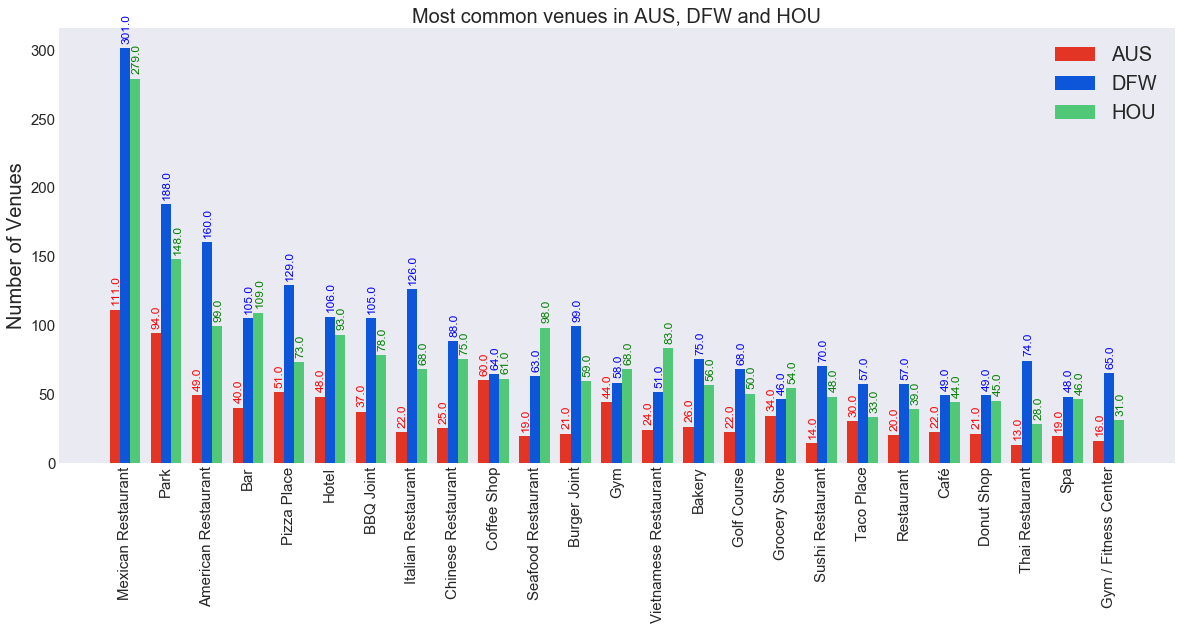

In [98]:
#filter for top 25 venues and sort
venue_count_top25 = venue_count.head(25)
print(venue_count_top25.shape)
venue_count_top25.reset_index(inplace = True)
venue_count_top25.columns = ['venue', 'AUS', 'DFW','HOU','total']

#visualize top 25 venues
X = np.arange(25)
width = 0.25

import matplotlib 
matplotlib.rcParams.update({'font.size': 12})

plt.figure(figsize=(20,8), facecolor = 'white')

plt.bar(X + 0.00, venue_count_top25['AUS'], color = '#e23525', width = width)
plt.bar(X + width, venue_count_top25['DFW'], color = '#0D56D9', width = width)
plt.bar(X + 2*width, venue_count_top25['HOU'], color = '#50C878', width = width)

plt.ylabel('Number of Venues', fontsize=20)
plt.title('Most common venues in AUS, DFW and HOU', fontsize=20)

for s, d in zip(X, venue_count_top25['AUS']):
    plt.annotate(venue_count_top25.AUS[s], xy = (s-0.1,d+5), rotation=90, color='red')
for s, d in zip(X, venue_count_top25['DFW']):
    plt.annotate(venue_count_top25.DFW[s], xy = (s+0.16,d+5), rotation=90, color='blue')
for s, d in zip(X, venue_count_top25['HOU']):
    plt.annotate(venue_count_top25.HOU[s], xy = (s+0.42,d+5), rotation=90, color='green')    

plt.xticks(X + width, venue_count_top25['venue'], rotation='vertical')
plt.legend(labels = venue_count_top25.columns[1:4], loc='best', fontsize=20)

plt.show()

DFW and HOU are about the same size, while AUS is less than half the size of the two mega-cities. (from the previous calculation, we see that the dataset contains **201 zip codes for DFW, 191 for HOU, and only 81 for AUS**). Therefore, in terms of the absolute number of venues returned, AUS is the least, while DFW is slightly better than HOU overall.

•	**Mexican restaurants are the most common venue type**. This is expected as Texas shares borders with Mexico, and a significant portion of the population is of Mexican/Latino/Hispanic ethnicity. So the Mexican cuisine here in all three cities must be authentic. 

•	The three cities have roughly the **same number of coffee shops**, which comes as the 10th most popular venue. Considering the size and population of AUS, this shows AUS people enjoy a higher number of coffee shops. In general, **AUS people enjoy a more bourgeois lifestyle**.

For a better comparison, we should look at those numbers when **normalized with the number of inhabitants** of all three cities


In [168]:
print(f'Shape of AUS ZIP-code only dataframe: {AUS_zip.shape}')
print(f'Shape of DFW ZIP-code only dataframe: {DFW_zip.shape}')
print(f'Shape of HOU ZIP-code only dataframe: {HOU_zip.shape}')
print(f'Shape of filtered data frame including all ZIP-codes for AUS,DFW and HOU: {AUS_DFW_HOU_zip.shape}')

Shape of AUS ZIP-code only dataframe: (81, 9)
Shape of DFW ZIP-code only dataframe: (201, 9)
Shape of HOU ZIP-code only dataframe: (191, 9)
Shape of filtered data frame including all ZIP-codes for AUS,DFW and HOU: (473, 9)


In [54]:
AUS_DFW_HOU_SUM = AUS_DFW_HOU_zip.groupby(['area'],as_index = False).sum()
AUS_DFW_HOU_SUM

print(f'Population of AUS: {AUS_DFW_HOU_SUM["population"][0]}')
print(f'Population of DFW: {AUS_DFW_HOU_SUM["population"][1]}')
print(f'Population of HOU: {AUS_DFW_HOU_SUM["population"][2]}')

Population of AUS: 1950712
Population of DFW: 6357043
Population of HOU: 6209033


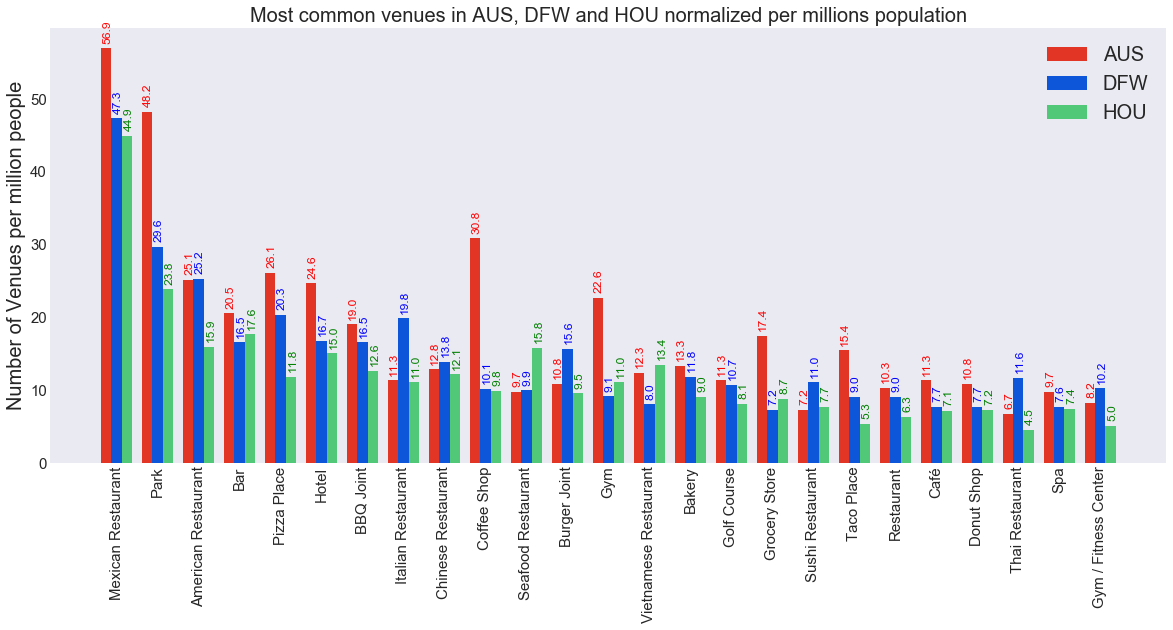

In [102]:
#data needs to be normalized based on inhabitans (in millions) 
venue_count_ntop25 = venue_count_top25.copy()
venue_count_ntop25['AUS'] = venue_count_top25['AUS'] / AUS_DFW_HOU_SUM["population"][0] * 1000000 
venue_count_ntop25['DFW'] = venue_count_top25['DFW'] / AUS_DFW_HOU_SUM["population"][1] * 1000000
venue_count_ntop25['HOU'] = venue_count_top25['HOU'] / AUS_DFW_HOU_SUM["population"][2] * 1000000
venue_count_ntop25 = venue_count_ntop25.round(1)

#visualize top 25 venues using normalized data
X = np.arange(25)
width = 0.25

import matplotlib 
matplotlib.rcParams.update({'font.size': 12})

plt.figure(figsize=(20,8), facecolor = 'white')

plt.bar(X + 0.00, venue_count_ntop25['AUS'], color = '#e23525', width = width)
plt.bar(X + width, venue_count_ntop25['DFW'], color = '#0D56D9', width = width)
plt.bar(X + 2*width, venue_count_ntop25['HOU'], color = '#50C878', width = width)

plt.ylabel('Number of Venues per million people', fontsize=20)
plt.title('Most common venues in AUS, DFW and HOU normalized per millions population', fontsize=20)

for s, d in zip(X, venue_count_ntop25['AUS']):
    plt.annotate(venue_count_ntop25.AUS[s], xy = (s-0.1,d+1), rotation=90, color='red')
for s, d in zip(X, venue_count_ntop25['DFW']):
    plt.annotate(venue_count_ntop25.DFW[s], xy = (s+0.16,d+1), rotation=90, color='blue')
for s, d in zip(X, venue_count_ntop25['HOU']):
    plt.annotate(venue_count_ntop25.HOU[s], xy = (s+0.42,d+1), rotation=90, color='green')    

plt.xticks(X + width, venue_count_ntop25['venue'], rotation='vertical')
plt.legend(labels = venue_count_ntop25.columns[1:4], loc='best', fontsize=20)

plt.show()

Normalized data shows that, in general, **AUS is the most convenient city** amongst the three. It almost **topped almost every category**. 

•	**Mexican restaurants** are still the most popular venue for all three cities.

•	AUS people enjoy a disproportionally large number of parks, coffee shops, gyms, grocery stores, and Taco place, which align with **Austinites’ hipster and bourgeois living style**.

•	In general, **DFW is slightly better than HOU** in terms of the most common venues.


In [109]:
#group rows by ZIP-code and by taking the mean of the frequency of occurrence of each category
grouped_AUS_DFW_HOU = onehot_AUS_DFW_HOU.groupby('zipcode').mean().reset_index()
print(f'Shape: {grouped_AUS_DFW_HOU.shape}')

Shape: (470, 469)


#### Clustering
The final data frame is used for analysis of the ZIP-codes: clustering in order to find similarity in areas from DFW and AUS.

Clustering is used for segmentation of the different ZIP-codes and is one of the unsupervised mashine learning methods. Each cluster is a group of objects (i.e. ZIP-code) that are similar to other objects in the cluster, and dissimilar to data points in other clusters.

For this analysis k-Means clustering is used. k-Means is a type of partition-based clustering in order to partitioning the data base into groups of individuals with similar characteristics. It divides data into non-overlapping subsets (clusters) without any cluster-internal structure. k-Means tries to minimize intra-cluster distances (e.g. Euclidean or other methods for measuring of distance) and maximize inter-cluster distances. It is an iterative algorithm, but the results depend on the initial defined number of clusters. In turn, this means that results (i.e. clusters) are guaranteed, but may be the optimum. Therefore, the algorithm will be run several times with different amount of initialy defined clusters. The algorythm returns inertia, or cost, which can be recognized as a measure of how internally coherent clusters are.

In [111]:
#find best k

clustering_AUS_DFW_HOU = grouped_AUS_DFW_HOU.drop('zipcode', 1)

best_k = []
for k in range (1, 20):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(clustering_AUS_DFW_HOU.iloc[:, :])

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    best_k.append([k,interia])
    print ("k:",k, " cost:", interia)
best_k = pd.DataFrame(best_k)
best_k.columns = ['k', 'Cost']
best_k

k: 1  cost: 54.543702356421605
k: 2  cost: 52.18537730076515
k: 3  cost: 50.947624323346425
k: 4  cost: 48.71377335570601
k: 5  cost: 47.63949111099818
k: 6  cost: 46.64986510420448
k: 7  cost: 45.12299356341497
k: 8  cost: 44.31557198103425
k: 9  cost: 42.93108846827462
k: 10  cost: 42.446609720602986
k: 11  cost: 41.94473514518758
k: 12  cost: 40.96453575727951
k: 13  cost: 40.272837156336784
k: 14  cost: 39.95250825394614
k: 15  cost: 39.001822075278426
k: 16  cost: 38.82932244616305
k: 17  cost: 38.386727164409514
k: 18  cost: 38.10672716440951
k: 19  cost: 37.36808260818861


,k,Cost
0,1,54.543702
1,2,52.185377
2,3,50.947624
3,4,48.713773
4,5,47.639491
5,6,46.649865
6,7,45.122994
7,8,44.315572
8,9,42.931088
9,10,42.446610


The problem with k-Means: increasing k always reduces inertia / cost. Therefore, the value of cost as a function of k is plotted and an 'elbow' point is determined where the rate of decrease sharply shifts. This is selected as the right k for clustering ( elbow method).

<function matplotlib.pyplot.show(*args, **kw)>

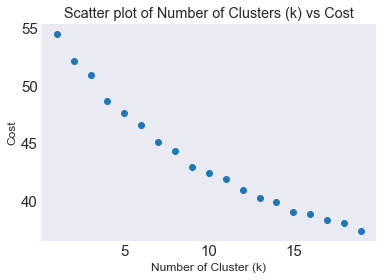

In [112]:
#plot cost values of k's as calculated above, to find best k value ('elbow')
plt.scatter(best_k['k'],best_k['Cost'])
plt.title("Scatter plot of Number of Clusters (k) vs Cost")
plt.ylabel("Cost")
plt.xlabel("Number of Cluster (k)")
plt.show

In [147]:
#cluster ZIP-codes by best k (lowest cost as calculated above, but at the same time fitting the data - see 'elbow' of line plot)
# best k value is set at 15, which is reasonable comparing 295 areas with each other
# set number of clusters

# import k-means from clustering stage
from sklearn.cluster import KMeans

kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering_AUS_DFW_HOU)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:]

array([0, 3, 0, 0, 6, 0, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       1, 3, 1, 0, 6, 0, 0, 1, 1, 0, 0, 1, 0, 3, 1, 0, 6, 0, 0, 3, 0, 0,
       0, 3, 3, 6, 0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 5, 2, 1, 0, 6, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 3, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 4, 0, 1, 1, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0,
       0, 5, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 0, 3, 6, 0, 1, 0, 0, 0, 0, 3,
       0, 1, 3, 0, 1, 3, 0, 1, 3, 0, 0, 0, 1, 3, 3, 0, 0, 1, 1, 3, 5, 0,
       6, 0, 5, 6, 1, 4, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 0,
       1, 3, 1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 6, 3, 6, 0, 1, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 1, 1, 0, 0, 0,

In [159]:
#First write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

AUS_DFW_HOU_grouped = onehot_AUS_DFW_HOU.groupby('zipcode').mean().reset_index()
AUS_DFW_HOU_grouped.head()

#create the new dataframe and display the top 10 venues for each ZIP-code
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} most common venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th most common venue'.format(ind+1))

# create a new dataframe
zipcode_AUS_DFW_HOU_venues_sorted = pd.DataFrame(columns=columns)
zipcode_AUS_DFW_HOU_venues_sorted['zipcode'] = AUS_DFW_HOU_grouped['zipcode']
zipcode_AUS_DFW_HOU_venues_sorted.head()

for ind in np.arange(AUS_DFW_HOU_grouped.shape[0]):
    zipcode_AUS_DFW_HOU_venues_sorted.iloc[ind, 1:] = return_most_common_venues(AUS_DFW_HOU_grouped.iloc[ind, :], num_top_venues)
    
zipcode_AUS_DFW_HOU_venues_sorted
zipcode_AUS_DFW_HOU_venues_sorted.insert(0, 'cluster labels', kmeans.labels_)

zipcode_AUS_DFW_HOU_venues_sorted

,cluster labels,zipcode,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,0,75001,Italian Restaurant,American Restaurant,Pizza Place,Seafood Restaurant,Smoke Shop,Diner,Park,Steakhouse,Golf Course,Coffee Shop
1,3,75002,Park,Soccer Field,Baseball Field,Athletics & Sports,Auto Garage,Home Service,Mobile Phone Shop,Video Store,Grocery Store,Automotive Shop
2,0,75006,Korean Restaurant,Mexican Restaurant,Coffee Shop,Indian Restaurant,Pizza Place,Ice Cream Shop,Supermarket,Vietnamese Restaurant,Bakery,Juice Bar
3,0,75007,Nail Salon,Mexican Restaurant,Vietnamese Restaurant,Pizza Place,Playground,Pawn Shop,Gym,Gym / Fitness Center,Seafood Restaurant,Liquor Store
4,6,75009,Fast Food Restaurant,Stables,Café,Food,Zoo Exhibit,Flea Market,Falafel Restaurant,Farm,Farmers Market,Field
...,...,...,...,...,...,...,...,...,...,...,...,...
465,0,78757,Mexican Restaurant,Vietnamese Restaurant,Gym,Asian Restaurant,Indian Restaurant,Korean Restaurant,Gaming Cafe,Furniture / Home Store,Japanese Restaurant,Bakery
466,0,78758,Brewery,Italian Restaurant,Burger Joint,Furniture / Home Store,Donut Shop,Taco Place,Coffee Shop,Women's Store,Clothing Store,Sandwich Place
467,0,78759,Hotel,Asian Restaurant,Sporting Goods Shop,Park,Mexican Restaurant,Spa,Furniture / Home Store,Chinese Restaurant,Salon / Barbershop,Shopping Mall
468,0,78953,Spa,Flea Market,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service


In [160]:
AUS_DFW_HOU_zip.head()

,zipcode,city,county,area,state,latitude,longitude,population,density
0,78617,Del Valle,Travis,AUS,Texas,30.14718,-97.59615,28558,123.5
1,78645,Leander,Travis,AUS,Texas,30.44901,-97.96998,11254,118.9
2,78652,Manchaca,Travis,AUS,Texas,30.13281,-97.87467,5504,99.6
3,78653,Manor,Travis,AUS,Texas,30.33942,-97.52362,22804,60.4
4,78660,Pflugerville,Travis,AUS,Texas,30.44304,-97.59550,89830,584.7


In [161]:
merged_AUS_DFW_HOU = AUS_DFW_HOU_zip

# merge toronto_grouped with DFW_AUS_data to add latitude/longitude for each ZIP-code
merged_AUS_DFW_HOU = merged_AUS_DFW_HOU.join(zipcode_AUS_DFW_HOU_venues_sorted.set_index('zipcode'), on='zipcode')
merged_AUS_DFW_HOU.head()

,zipcode,city,county,area,state,latitude,longitude,population,density,cluster labels,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,78617,Del Valle,Travis,AUS,Texas,30.14718,-97.59615,28558,123.5,6.0,Racetrack,Intersection,Construction & Landscaping,Market,Fried Chicken Joint,Frozen Yogurt Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
1,78645,Leander,Travis,AUS,Texas,30.44901,-97.96998,11254,118.9,1.0,Mexican Restaurant,Grocery Store,Lake,Donut Shop,American Restaurant,Event Space,BBQ Joint,Trail,Coffee Shop,Pharmacy
2,78652,Manchaca,Travis,AUS,Texas,30.13281,-97.87467,5504,99.6,3.0,Baseball Field,Dance Studio,Thrift / Vintage Store,Gas Station,Home Service,Seafood Restaurant,Construction & Landscaping,Liquor Store,Park,Zoo Exhibit
3,78653,Manor,Travis,AUS,Texas,30.33942,-97.52362,22804,60.4,0.0,Intersection,Convenience Store,Chinese Restaurant,Theme Park,Auto Garage,Mexican Restaurant,Big Box Store,Gym,Baseball Field,Fast Food Restaurant
4,78660,Pflugerville,Travis,AUS,Texas,30.44304,-97.59550,89830,584.7,0.0,Pizza Place,Grocery Store,Fast Food Restaurant,Ice Cream Shop,Gift Shop,Coffee Shop,Mexican Restaurant,Bar,Bakery,Taco Place


In [162]:
merged_clean_AUS_DFW_HOU = merged_AUS_DFW_HOU.dropna(subset=['cluster labels'], axis = 0, inplace = False)
merged_clean_AUS_DFW_HOU = merged_clean_AUS_DFW_HOU.astype({'cluster labels': int})

In [163]:
print(f'Shape AUS-DFW-HOU: {merged_clean_AUS_DFW_HOU.shape}')
merged_clean_AUS_DFW_HOU.head()

Shape AUS-DFW-HOU: (470, 20)


,zipcode,city,county,area,state,latitude,longitude,population,density,cluster labels,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,78617,Del Valle,Travis,AUS,Texas,30.14718,-97.59615,28558,123.5,6,Racetrack,Intersection,Construction & Landscaping,Market,Fried Chicken Joint,Frozen Yogurt Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
1,78645,Leander,Travis,AUS,Texas,30.44901,-97.96998,11254,118.9,1,Mexican Restaurant,Grocery Store,Lake,Donut Shop,American Restaurant,Event Space,BBQ Joint,Trail,Coffee Shop,Pharmacy
2,78652,Manchaca,Travis,AUS,Texas,30.13281,-97.87467,5504,99.6,3,Baseball Field,Dance Studio,Thrift / Vintage Store,Gas Station,Home Service,Seafood Restaurant,Construction & Landscaping,Liquor Store,Park,Zoo Exhibit
3,78653,Manor,Travis,AUS,Texas,30.33942,-97.52362,22804,60.4,0,Intersection,Convenience Store,Chinese Restaurant,Theme Park,Auto Garage,Mexican Restaurant,Big Box Store,Gym,Baseball Field,Fast Food Restaurant
4,78660,Pflugerville,Travis,AUS,Texas,30.44304,-97.59550,89830,584.7,0,Pizza Place,Grocery Store,Fast Food Restaurant,Ice Cream Shop,Gift Shop,Coffee Shop,Mexican Restaurant,Bar,Bakery,Taco Place


In [164]:
#Use geopy library to get the latitude and longitude values of Berlin and Hamburg

address_AUS = 'AUS'
geolocator_AUS = Nominatim(user_agent="ha_explorer")
location_AUS = geolocator_AUS.geocode(address_AUS)
latitude_AUS = location_AUS.latitude
longitude_AUS = location_AUS.longitude
print(f'The geographical coordinate of AUS are {latitude_AUS}, {longitude_AUS}.')

address_DFW = 'DFW'
geolocator_DFW = Nominatim(user_agent="DFW_explorer")
location_DFW = geolocator_DFW.geocode(address_DFW)
latitude_DFW = location_DFW.latitude
longitude_DFW = location_DFW.longitude
print(f'The geographical coordinate of DFW are {latitude_DFW}, {longitude_DFW}.')

address_HOU = 'HOU'
geolocator_HOU = Nominatim(user_agent="HOU_explorer")
location_HOU = geolocator_HOU.geocode(address_HOU)
latitude_HOU = location_HOU.latitude
longitude_HOU = location_HOU.longitude
print(f'The geographical coordinate of HOU are {latitude_HOU}, {longitude_HOU}.')


latitude_center = (latitude_AUS + latitude_DFW + latitude_HOU) / 3
longitude_center = (longitude_AUS + longitude_DFW + longitude_HOU) / 3

print(f'The geographical middle among the 3 cities is: {latitude_center}, {longitude_center}')

The geographical coordinate of AUS are 30.19348925, -97.66500963529677.
The geographical coordinate of DFW are 32.89651945, -97.0465220537124.
The geographical coordinate of HOU are 29.64714905, -95.27692608634595.
The geographical middle among the 3 cities is: 30.912385916666665, -96.6628192584517


In [172]:
# create map for DFW and AUS
map_AUS_DFW_HOU_clusters = folium.Map(location=[latitude_center, longitude_center], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, population, density in zip(merged_clean_AUS_DFW_HOU['latitude'], 
                                  merged_clean_AUS_DFW_HOU['longitude'], 
                                  merged_clean_AUS_DFW_HOU['zipcode'], 
                                  merged_clean_AUS_DFW_HOU['cluster labels'],
                                  merged_clean_AUS_DFW_HOU['population'],
                                  merged_clean_AUS_DFW_HOU['density']
                                 ): #for clustering add cluster here
    label = folium.Popup('ZIP-code: ' + str(poi) + ' | Cluster: ' + str(cluster) + ' | Population: ' + str(population) +' | Density: ' + str(density), 
                         parse_html=True) 
                         
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_AUS_DFW_HOU_clusters)
       
map_AUS_DFW_HOU_clusters

In [173]:
map_AUS_DFW_HOU_clusters

In [174]:
map_AUS_DFW_HOU_clusters

In [166]:
#show number of ZIP-codes per cluster
merged_clean_AUS_DFW_HOU.sort_values(by = ['cluster labels'], inplace = True)
cluster_count = merged_clean_AUS_DFW_HOU['cluster labels'].value_counts()
cluster_count = pd.DataFrame(cluster_count).reset_index()
cluster_count.columns = ['Cluster','ZIP-codes']
cluster_count.sort_values(by = 'Cluster')

,Cluster,ZIP-codes
0,0,256
1,1,94
7,2,2
2,3,72
5,4,7
4,5,10
3,6,27
6,7,2


### Conclusion:

As can be seen, certain clusters are more common while some are unique or rare. This is  expected, as some zipcode area share a common cause, e.g. housing. These neighborhoods fall into the same cluster as they share a similar venue structure. They are close to the city center.

At the same time, zipcode areas located at the center of all three cities share similar trends too, These are more venue crowded neighborhoods. 

To get deeper insights into what makes each cluster different, check out the full table below. 

Thanks a lot for reading, all Feedback, ideas and comments are much appreciated.

In [167]:
merged_clean_AUS_DFW_HOU

,zipcode,city,county,area,state,latitude,longitude,population,density,cluster labels,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
235,76039,Euless,Tarrant,DFW,Texas,32.85936,-97.08383,35394,1952.7,0,Pizza Place,Nail Salon,Thai Restaurant,Hotel,Dive Bar,Auto Garage,College Gym,BBQ Joint,Salon / Barbershop,Park
255,76114,Fort Worth,Tarrant,DFW,Texas,32.77444,-97.40272,25416,1046.0,0,Gym / Fitness Center,Thrift / Vintage Store,Café,Mexican Restaurant,Golf Course,Campground,Baseball Field,Grocery Store,Sandwich Place,Trail
254,76112,Fort Worth,Tarrant,DFW,Texas,32.74812,-97.21845,41743,1328.5,0,Seafood Restaurant,Storage Facility,Hobby Shop,BBQ Joint,Bakery,Bar,Clothing Store,Gym,Gun Range,Paper / Office Supplies Store
253,76111,Fort Worth,Tarrant,DFW,Texas,32.77809,-97.29988,22320,1014.6,0,Vietnamese Restaurant,Thai Restaurant,Bakery,Restaurant,Asian Restaurant,River,Hobby Shop,Electronics Store,BBQ Joint,Baseball Field
251,76109,Fort Worth,Tarrant,DFW,Texas,32.70100,-97.38392,23512,1028.1,0,American Restaurant,Pizza Place,New American Restaurant,Trail,Burger Joint,Park,French Restaurant,Cajun / Creole Restaurant,Movie Theater,College Bookstore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,77355,Magnolia,Montgomery,HOU,Texas,30.15769,-95.74806,28074,162.4,6,Shop & Service,Golf Course,Lake,Construction & Landscaping,Filipino Restaurant,Fish Market,Fish & Chips Shop,Fireworks Store,Financial or Legal Service,Field
100,75173,Nevada,Collin,DFW,Texas,33.05923,-96.39106,4131,55.2,6,Track,Business Service,Gym,Discount Store,Diner,Construction & Landscaping,Football Stadium,Baseball Field,Field,Fast Food Restaurant
0,78617,Del Valle,Travis,AUS,Texas,30.14718,-97.59615,28558,123.5,6,Racetrack,Intersection,Construction & Landscaping,Market,Fried Chicken Joint,Frozen Yogurt Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
50,78650,Mc Dade,Bastrop,AUS,Texas,30.29938,-97.21842,1672,9.2,7,Farm,Zoo Exhibit,Flea Market,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
